# 作業目標:

    通過建立多層的神經網路, 了解權值矩陣更新

# 作業重點: 

3  層神經網路

通過增加更多的中間層，以對更多關係的組合進行建模

syn1 權值矩陣將隱層的組合輸出映射到最終結果，

而在更新 syn1 的同時，還需要更新 syn0 權值矩陣，

以從輸入資料中更好地產生這些組合

In [3]:
import numpy as np
 
# Sigmoid 函數可以將任何值都映射到一個位於 0 到  1 範圍內的值。通過它，我們可以將實數轉化為概率值
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])  
        
# define y for output dataset            
# define output dataset 
y = np.array([[0,0,1,1]]).T


In [4]:

# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)
#亂數設定產生種子得到的權重初始化集仍是隨機分佈的，
#但每次開始訓練時，得到的權重初始集分佈都是完全一致的。
 
# initialize weights randomly with mean 0
syn0 = 2*np.random.random((3,3)) - 1
# define syn1
syn1 = 2*np.random.random((3,1)) - 1

iter = 0
#該神經網路權重矩陣的初始化操作。
#用 “syn0” 來代指 (即“輸入層-第一層隱層”間權重矩陣）
#用 “syn1” 來代指 (即“輸入層-第二層隱層”間權重矩陣）

yn0_history = [syn0]
yn1_history = [syn1]


神經網路訓練
for 迴圈反覆運算式地多次執行訓練代碼，使得我們的網路能更好地擬合訓練集

In [7]:
for iter in range(10000):
    # forward propagation
    l0 = X
    l1 = np.dot(l0,syn0)
    l2 = nonlin(np.dot(l1,syn1))
    
    '''
    新增
    l2_error 該值說明了神經網路預測時“丟失”的數目。
    l2_delta 該值為經確信度加權後的神經網路的誤差，除了確信誤差很小時，它近似等於預測誤差。
    '''
 
    # how much did we miss?
    l2_error = y - l2
 
    # multiply how much we missed by the 
    # slope of the sigmoid at the values in l2
    l2_delta = l2_error * nonlin(l2,True)
    
    l1_delta = l2_delta.dot(syn1.T)   #the first-hidden layer error  
    
    # update weights
    # syn1 update weights
    syn1 += np.dot(l1.T,l2_delta)
    syn0 += np.dot(l0.T,l1_delta)

    
print("Output After Training:")
print(l2)
print("\n\n")
print(l1)

Output After Training:
[[0.00128514]
 [0.00102542]
 [0.99917058]
 [0.99896046]]



[[-0.84476784 -1.30848094  1.00472136]
 [-1.24428856 -2.11365998  0.33341975]
 [-0.62667448  0.7460562  -1.92334804]
 [-1.0261952  -0.05912284 -2.59464965]]


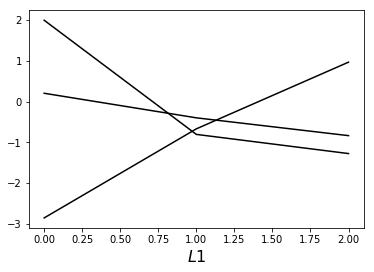

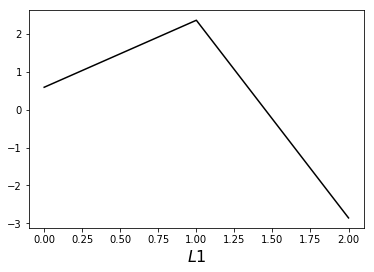

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline 
#適用於 Jupyter Notebook, 宣告直接在cell 內印出執行結果

plt.plot(yn0_history[0], ms=3, lw=1.5, color='black')
plt.xlabel(r'$L1$', fontsize=16)
plt.show()

plt.plot(yn1_history[0], ms=3, lw=1.5, color='black')
plt.xlabel(r'$L1$', fontsize=16)
plt.show()